<a href="https://colab.research.google.com/github/Henrique047/PDI_T2/blob/main/PDI_T2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install wget


  Preparing metadata (setup.py) ... done
  Created wheel for wget: filename=wget-3.2-py3-none-any.whl size=9655 sha256=8cf5ef7b9033d99edadde971c8d368b60d5a76fa8436522785ef81fd353722ee
  Stored in directory: /root/.cache/pip/wheels/40/b3/0f/a40dbd1c6861731779f62cc4babcb234387e11d697df70ee97
Successfully built wget


In [4]:
!git clone https://github.com/BIDS/BSDS500.git

Cloning into 'BSDS500'...
remote: Enumerating objects: 2380, done.
remote: Total 2380 (delta 0), reused 0 (delta 0), pack-reused 2380 (from 1)
Receiving objects: 100% (2380/2380), 155.21 MiB | 30.45 MiB/s, done.
Resolving deltas: 100% (139/139), done.
Updating files: 100% (2268/2268), done.


In [5]:
import os

# Caminho para as imagens de treino
path = "BSDS500/BSDS500/data/images/train"

# Listar imagens
images = os.listdir(path)
print(images)


['112082.jpg', '109034.jpg', '202012.jpg', '173036.jpg', '376020.jpg', '246053.jpg', '100098.jpg', '301007.jpg', '66039.jpg', '104022.jpg', '260081.jpg', '22013.jpg', '23025.jpg', '376001.jpg', '135037.jpg', '368078.jpg', '176019.jpg', '59078.jpg', '198054.jpg', '78019.jpg', '169012.jpg', '108041.jpg', '368016.jpg', '90076.jpg', '293029.jpg', '22093.jpg', '183055.jpg', '16052.jpg', '2092.jpg', '113009.jpg', '105019.jpg', '130034.jpg', '134052.jpg', '106025.jpg', '323016.jpg', '54005.jpg', '159029.jpg', '216053.jpg', '181018.jpg', '41004.jpg', '23080.jpg', '45077.jpg', '87065.jpg', '60079.jpg', '22090.jpg', '159045.jpg', '145053.jpg', '55075.jpg', '285036.jpg', '155060.jpg', '189003.jpg', '151087.jpg', '15004.jpg', '163014.jpg', '35091.jpg', '15088.jpg', '187039.jpg', '374020.jpg', '277095.jpg', '207056.jpg', '161062.jpg', '97017.jpg', '42044.jpg', '12003.jpg', '117054.jpg', '311068.jpg', '365025.jpg', '311081.jpg', '249087.jpg', '108073.jpg', '372047.jpg', '12074.jpg', '122048.jpg', '6

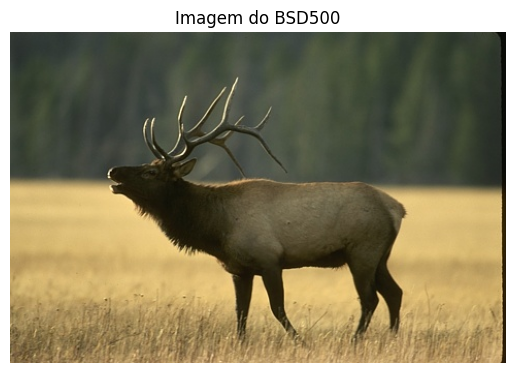

In [12]:
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np

# Escolher uma imagem
img_path = os.path.join(path, images[39])  # ou qualquer outro índice

# Abrir a imagem
img = Image.open(img_path)

# Mostrar a imagem
plt.imshow(img)
plt.title("Imagem do BSD500")
plt.axis('off')
plt.show()


In [13]:
# Converte a imagem em array NumPy
img_np = np.array(img).astype(np.float32)


In [14]:
def add_gaussian_noise(image_np, mean=0, std_dev=20):
    noise = np.random.normal(mean, std_dev, image_np.shape)
    noisy = image_np + noise
    # Clampa os valores entre 0 e 255
    noisy = np.clip(noisy, 0, 255)
    return noisy.astype(np.uint8)


In [15]:
def add_speckle_noise(image_np, std_dev=0.2):
    noise = np.random.normal(0, std_dev, image_np.shape)
    noisy = image_np + image_np * noise
    noisy = np.clip(noisy, 0, 255)
    return noisy.astype(np.uint8)


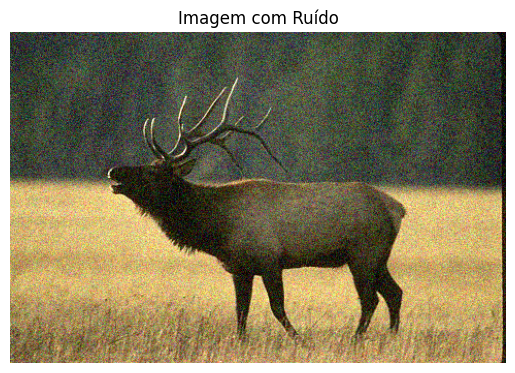

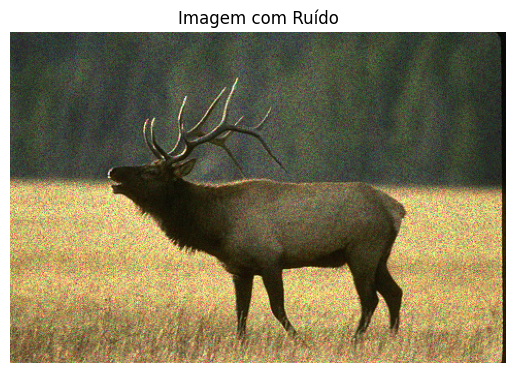

In [20]:
# Aplica ruído
noisy_img = add_gaussian_noise(img_np, std_dev=25)
# noisy_img = add_speckle_noise(img_np, std_dev=0.3)

# Mostra a imagem
plt.imshow(noisy_img.astype(np.uint8))
plt.title("Imagem com Ruído")
plt.axis('off')
plt.show()

# Aplica ruído
noisy_img2 = add_speckle_noise(img_np, std_dev=0.2)
# noisy_img = add_speckle_noise(img_np, std_dev=0.3)

# Mostra a imagem
plt.imshow(noisy_img2.astype(np.uint8))
plt.title("Imagem com Ruído")
plt.axis('off')
plt.show()